
Distribuição da variável alvo (Heart_Disease):

Heart_Disease
No     283883
Yes     24971
Name: count, dtype: int64


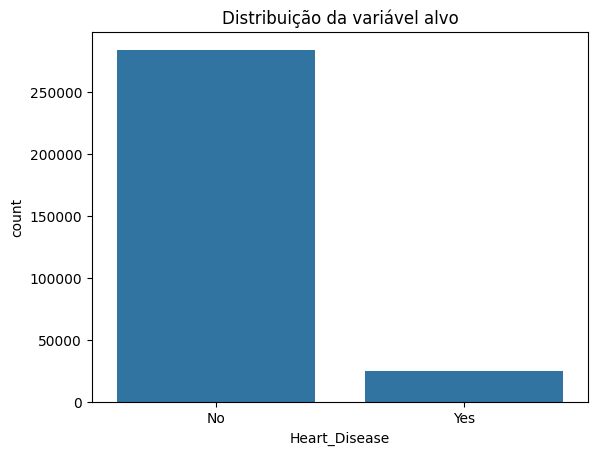


Resultados do K-Nearest Neighbors:

Matriz de Confusão:


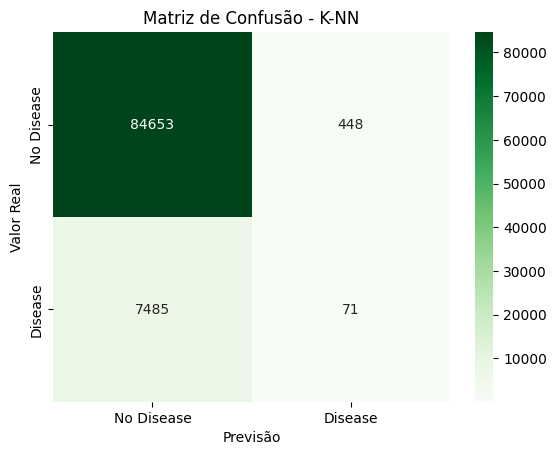


Relatório de Classificação:
              precision    recall  f1-score   support

          No       0.92      0.99      0.96     85101
         Yes       0.14      0.01      0.02      7556

    accuracy                           0.91     92657
   macro avg       0.53      0.50      0.49     92657
weighted avg       0.85      0.91      0.88     92657


Acurácia do Modelo: 0.9143831550773283


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
file_path = "../Ficheiros CSV/CVD_cleaned.csv"  # Caminho do arquivo já carregado no repositório

data = pd.read_csv(file_path)

# Garantir que a coluna 'Heart_Disease' está presente
if 'Heart_Disease' not in data.columns:
    raise KeyError("A coluna 'Heart_Disease' não está presente no dataset.")

# Exploração da variável alvo
print("\nDistribuição da variável alvo (Heart_Disease):\n")
print(data['Heart_Disease'].value_counts())
sns.countplot(x='Heart_Disease', data=data)
plt.title("Distribuição da variável alvo")
plt.show()

# Separação de features e alvo
X = data.drop(columns=['Heart_Disease'])  # Remover a coluna alvo
y = data['Heart_Disease']

# Codificar variáveis categóricas (se necessário)
X = pd.get_dummies(X, drop_first=True)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Treinamento do modelo K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Previsões
y_pred_knn = knn.predict(X_test)

# Avaliação do modelo K-NN
print("\nResultados do K-Nearest Neighbors:")
print("\nMatriz de Confusão:")
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Matriz de Confusão - K-NN")
plt.ylabel("Valor Real")
plt.xlabel("Previsão")
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_knn))

print("\nAcurácia do Modelo:", accuracy_score(y_test, y_pred_knn))
